In [127]:
import matplotlib.pyplot as plt
import numpy as np

def LUmine(A):
    n = A.shape[0]
    L = np.matrix( np.identity(n) )
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0
    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.matrix( np.zeros( (n,n) ) )
    for j in range(0, n):
        q = A[:,j]
        q = q.reshape((n,1))
        for i in range(0, j):
            length_of_leg = np.sum( A[:,j].T * Q[:,i])
            q = q - length_of_leg * Q[:,i]
        Q[:,j] = q / np.linalg.norm(q)
    R = Q.T * A
    return Q, R

## Ερώτημα (α)

In [128]:
def Hilbert(n):
    H = np.matrix( np.zeros( (n,n) ) )
    for i in range(n):
        for j in range(n):
            H[i,j] = 1 / (i + j + 1)
    return H

print(Hilbert(4))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


## Ερώτημα (β)

In [129]:
def LUsolve(A, b):
    LU = LUmine(A.copy())
    L = LU[0]
    U = LU[1]
    n = b.shape[0]
    y = np.matrix( np.ones(n) ).reshape((n,1))
    x = np.matrix( np.ones(n) ).reshape((n,1))

    for i in range(n):
        y[i] = (b[i] - np.sum(L[i,:i] * y[:i])) / L[i,i]

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(U[i,i+1:] * x[i+1:])) / U[i,i]
        
    return x

def QRsolve(A, b):
    QR = QRmine(A)
    Q = QR[0]
    R = QR[1]
    n = b.shape[0]
    b = b.reshape((n,1))

    y = Q.T.dot(b)
    x = np.matrix( np.ones(n) ).reshape((n,1))

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(R[i,i+1:] * x[i+1:])) / R[i,i]

    return x

In [130]:
n = 4
Hil = Hilbert(n)
b = np.ones((n, 1))

solution1 = QRsolve(Hil, b)
print("Solution with QR:")
print(solution1)
print("Check if it works:")
print(Hil * solution1)

solution2 = LUsolve(Hil.copy(), b)
print("Solution with LU:")
print(solution2)
print("Check if it works:")
print(Hil * solution2)

Solution with QR:
[[  -3.99999998]
 [  59.99999978]
 [-179.99999947]
 [ 139.99999966]]
Check if it works:
[[1.]
 [1.]
 [1.]
 [1.]]
Solution with LU:
[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
Check if it works:
[[1.]
 [1.]
 [1.]
 [1.]]


## Ερώτημα (γ)

In [131]:
n = 4
Hil = Hilbert(n)
b = np.ones((n, 1))

bNew = b + 1e-15

x = LUsolve(Hil, b)
xnew = LUsolve(Hil, bNew)
print(x)
print(xnew)

diff = np.max(np.abs(x - xnew))
print(diff)

[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
9.094947017729282e-13


## Ερώτημα (δ)

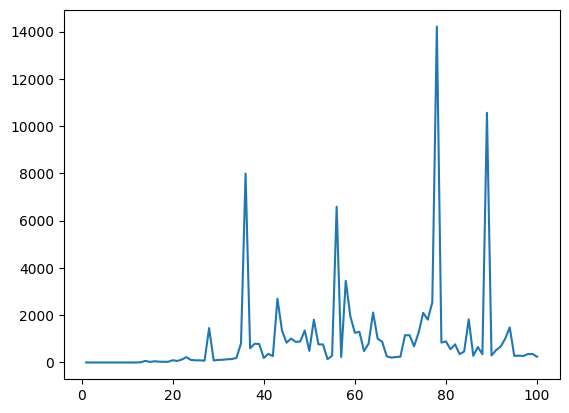

In [132]:
def calculateDiff(n):
    Hil = Hilbert(n)
    b = np.ones((n, 1))
    bNew = b + 1e-15
    x = LUsolve(Hil.copy(), b)
    xnew = LUsolve(Hil.copy(), bNew)

    diff = np.max(np.abs(x - xnew))
    return diff

def plotDiff(n):
    xpoints = np.array([i for i in range(1, n+1)])

    ypoints = np.ones((n, 1))
    for i in range(1,n+1):
        ypoints[i-1] = calculateDiff(i)

    plt.plot(xpoints, ypoints)
    plt.show()

plotDiff(100)

Παρατηρούμε ότι η διαφορά σε ορισμένα σημεία είναι πολύ μεγάλη (για n=[0,100] έχουμε μέγιστη απόλυτη διαφορά περίπου 14000)<br>
Κανονικά αυτό δεν είναι αναμενόμενο επειδή η αλλαγή στο b είναι πολύ μικρή.<br>
Οι μεγάλες απόλυτες διαφορές εξηγούνται μέσω του τεράστιου δείκτη ευαισθησίας που παρουσιάζει ο πίνακας Hilbert<br>
<br>
Παρακάτω δείχνουμε τις τιμές του δείκτη ευαισθησίας του πίνακα Hilbert για διάφορες τιμές του n<br>
Πρέπει να σημειώσουμε ότι παρ'ολο που ο δείκτης ευαισθησίας είναι μεγάλος, αυτό δεν σημαίνει απαραίτητα ότι θα έχουμε μεγάλες διαφορές στις λύσεις xnew (αυτό γίνεται φανερό για n=[0,20])<br>

In [133]:
n = 30
conditionals = np.ones((n, 1))

for i in range(n):
    conditionals[i] = np.linalg.cond(Hilbert(i+1) , np.inf)

for index, value in enumerate(conditionals):
   print(f"{index+1}: {value}")

1: [1.]
2: [27.]
3: [748.]
4: [28375.]
5: [943656.00000171]
6: [29070279.00766409]
7: [9.85194891e+08]
8: [3.38727926e+10]
9: [1.09965273e+12]
10: [3.53539945e+13]
11: [1.23107451e+15]
12: [4.00333853e+16]
13: [4.36164207e+18]
14: [7.6050934e+17]
15: [4.93737606e+17]
16: [1.72812905e+18]
17: [1.19482967e+18]
18: [2.44010971e+19]
19: [4.599364e+18]
20: [3.36498492e+18]
21: [2.34312668e+20]
22: [6.65413634e+18]
23: [8.13526341e+19]
24: [3.1077487e+18]
25: [4.35582703e+19]
26: [6.49087649e+18]
27: [9.10713322e+18]
28: [1.91651436e+19]
29: [3.64437046e+20]
30: [3.67330817e+19]


## Ερώτημα (ε)

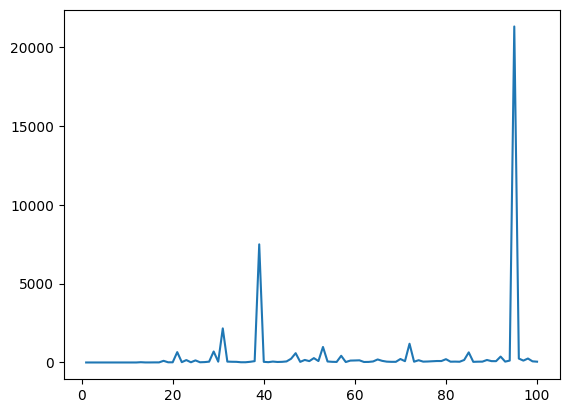

In [134]:
def calculateNorm(n):
    Hil = Hilbert(n)
    InvHil = np.linalg.inv(Hil)

    norm2 = np.linalg.norm(np.identity(n) - Hil * InvHil)
    return norm2


def plotNorms(n):
    xpoints = np.array([i for i in range(1, n+1)])

    ypoints = np.ones((n, 1))
    for i in range(1,n+1):
        ypoints[i-1] = calculateNorm(i)

    plt.plot(xpoints, ypoints)
    plt.show()

plotNorms(100)

Παρατηρούμε και εδώ ότι σε ορισμένα σημεία έχουμε μεγάλες αποκλίσεις απτην αναμενόμενη νόρμα 0.<br>
Αυτό επίσης οφείλεται στο μεγάλο δείκτη ευαισθησίας του πίνακα Hilbert, ο οποίος είναι αριθμητική ασταθής.<br>
Συμπεραίνουμε ότι ο αντίστροφος του πίνακα Hilbert είναι ανακριβής, εκτός εάν γίνει χρήση συμβολικών μαθηματικών (πχ 1/3 αντί για 0.333)

In [135]:
#Πρόβλημα Προσέγγισης
def calculate_T_values(min, max, points):
    T = np.empty(points)
    h = (max - min) / points

    for i in range(points):
        T[i] = min + h * i

    return T

def calculate_Y_values(T):
    Y = np.empty(T.shape[0])

    Y[:] = np.cos(4 * T[:]) + 0.1 * np.random.randn(T.shape[0])
    return Y

def solveLeastSquares(T, Y, grade):
    A = np.ones((T.shape[0] , grade))

    for j in range(1, grade):
        A[:, j] = T[:] ** j

    x1 = QRsolve(A.T.dot(A), A.T.dot(Y))
    x2 = LUsolve(A.T.dot(A), A.T.dot(Y))

    print("polynomial with QR:")
    print(x1)

    print("polynomial with LU:")
    print(x2)

    return A, x1, x2

def leastSquaresError(A, x1, x2, Y):
    r1 = Y - A.dot(x1)
    r2 = Y - A.dot(x2)

    r1 = np.linalg.norm(r1)
    r2 = np.linalg.norm(r2)

    print("Least Squares error with QR:", r1)
    print("Least Squares error with LU:", r2)

def plotApproximation(T, Y, x1, x2):
    plt.plot(T, Y, color = 'r', label='y(t)')
    
    x = np.linspace(0,1,100) #100 σημεία x του πολυωνύμου στο διάστημα [0,1]
    y1 = [np.polyval(np.flip(x1), i) for i in x] 
    plt.plot(x, y1, color = 'b', label='p_QR(t)')

    y2 = [np.polyval(np.flip(x2), i) for i in x]
    plt.plot(x, y2, color = 'g', label='p_LU(t)')
    
    plt.legend()
    plt.show()

Η συνάρτηση np.polyval υπολογίζει της τιμή του πολυωνύμου για συγκεκριμένες τιμές των συντελεστών (βρίσκονται στις μεταβλητές x1 και x2). Η συνάρτηση ξεκινάει απ'τον συντελεστή της μεγαλύτερης δύναμης, γι'αυτό εκτελούμε np.flip. Τοποθετούμε τις τιμές του του πολυωνύμου στις μεταβλητές y1 και y2 αντίστοιχα.

polynomial with QR:
[[ 1.00526774]
 [-0.08190981]
 [-8.71539002]
 [ 6.43898982]
 [ 0.72663092]]
polynomial with LU:
[[ 1.00526758]
 [-0.08190631]
 [-8.71540586]
 [ 6.43901448]
 [ 0.72661857]]
Least Squares error with QR: 52.68266362740145
Least Squares error with LU: 52.682663672784415


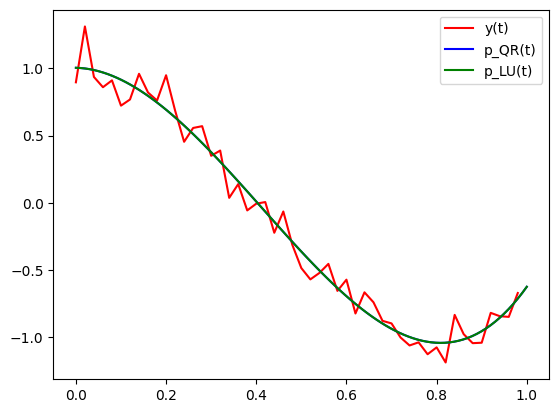

In [136]:
T = calculate_T_values(0, 1, 50)
Y = calculate_Y_values(T)
A ,x1 ,x2 = solveLeastSquares(T, Y, 5)
R = leastSquaresError(A, x1, x2, Y)
plotApproximation(T, Y, x1, x2)